In [1]:
import pandas as pd
import numpy as np
import tsfel
import os
import json
import matplotlib.pyplot as plt

In [2]:
module_path = os.path.join(os.getcwd(),'features.py') 
json_path = os.path.join(os.getcwd(),'features.json')

In [3]:
with open('feat_dict1.json', mode='rt') as f:
    dict_feact = json.load(f)

In [4]:
feat_dict = tsfel.get_features_by_domain('temporal', json_path)

In [5]:
feat_dict.update(dict_feact)

In [6]:
DataFrame= pd.read_csv('EMG-data.csv')
DF_1 = DataFrame[DataFrame.label==5].copy()
DF_1.rename(columns={'class':'group'}, inplace=True) 
DF_2 = DataFrame[DataFrame.label==8].copy()
DF_2.rename(columns={'class':'group'}, inplace=True) 

In [7]:
DF1 = DF_1[DF_1.group==5].copy()
DF2 = DF_2[DF_2.group==6].copy()

In [8]:
DF1.set_index('time',inplace = True)
DF2.set_index('time',inplace = True)
DF1 = DF1[['channel1']].copy()
DF2 = DF2[['channel1']].copy()

In [9]:
Features1 = tsfel.time_series_features_extractor(feat_dict, DF1, fs=1000, window_spliter = True, window_size=50, features_path =module_path)
Features2 = tsfel.time_series_features_extractor(feat_dict, DF2, fs=1000, window_spliter = True, window_size=50, features_path =module_path)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [10]:
Features1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   0_Histogram_0         121 non-null    float64
 1   0_Histogram_1         121 non-null    float64
 2   0_IAV                 121 non-null    float64
 3   0_LPCC_0              121 non-null    float64
 4   0_LPCC_1              121 non-null    float64
 5   0_MAV                 121 non-null    float64
 6   0_MFCC_0              121 non-null    float64
 7   0_RMS                 121 non-null    float64
 8   0_SSI                 121 non-null    float64
 9   0_Slope               121 non-null    float64
 10  0_Spectral slope      121 non-null    float64
 11  0_VAR                 121 non-null    float64
 12  0_Zero crossing rate  121 non-null    float64
dtypes: float64(13)
memory usage: 12.4 KB


Text(0.5, 0.98, 'Label8 Class6 histogram')

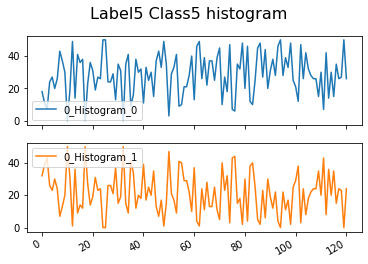

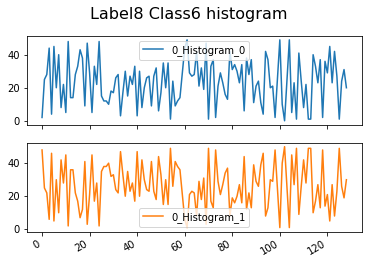

In [11]:
Features1.plot(y=['0_Histogram_0', '0_Histogram_1'], subplots = True)
plt.suptitle('Label5 Class5 histogram', fontsize=16)
Features2.plot(y=['0_Histogram_0', '0_Histogram_1'], subplots = True)
plt.suptitle('Label8 Class6 histogram', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 IAV & SSI')

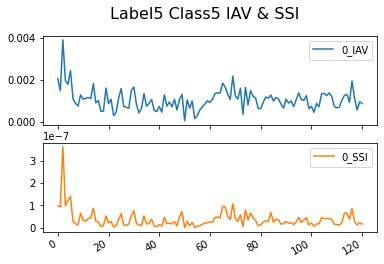

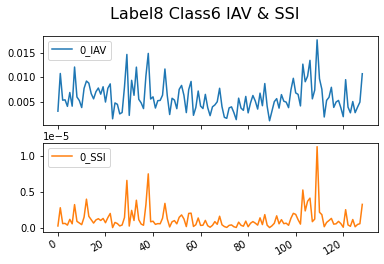

In [12]:
Features1.plot(y= ['0_IAV', '0_SSI'], subplots = True)
plt.suptitle('Label5 Class5 IAV & SSI', fontsize=16)
Features2.plot(y= ['0_IAV', '0_SSI'], subplots = True)
plt.suptitle('Label8 Class6 IAV & SSI', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 LPCC')

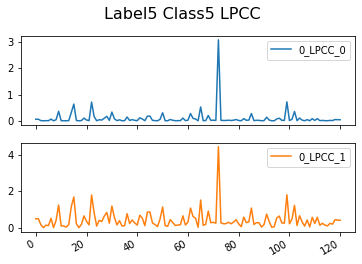

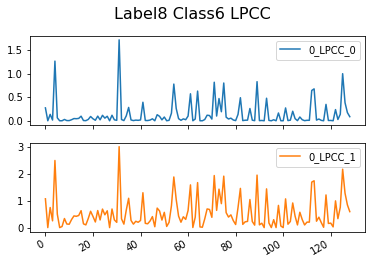

In [13]:
Features1.plot(y=['0_LPCC_0', '0_LPCC_1'], subplots=True)
plt.suptitle('Label5 Class5 LPCC', fontsize=16)
Features2.plot(y=['0_LPCC_0', '0_LPCC_1'], subplots=True)
plt.suptitle('Label8 Class6 LPCC', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 MAV & RMS')

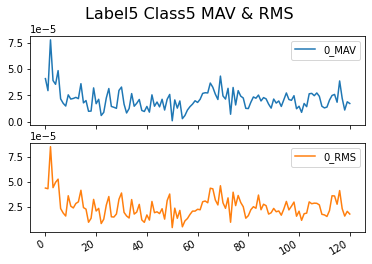

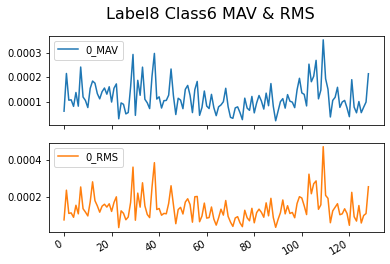

In [14]:
Features1.plot(y=['0_MAV', '0_RMS'], subplots=True)
plt.suptitle('Label5 Class5 MAV & RMS ', fontsize=16)
Features2.plot(y=['0_MAV', '0_RMS'], subplots=True)
plt.suptitle('Label8 Class6 MAV & RMS', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 MFCC')

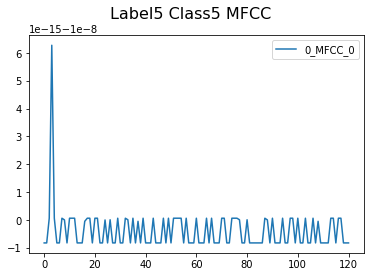

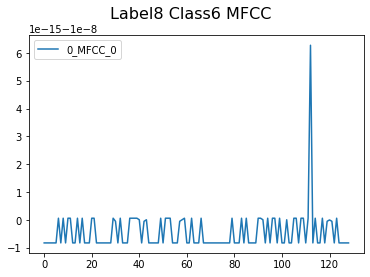

In [15]:
Features1.plot(y=['0_MFCC_0'])
plt.suptitle('Label5 Class5 MFCC', fontsize=16)
Features2.plot(y=['0_MFCC_0'])
plt.suptitle('Label8 Class6 MFCC', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 slope & var')

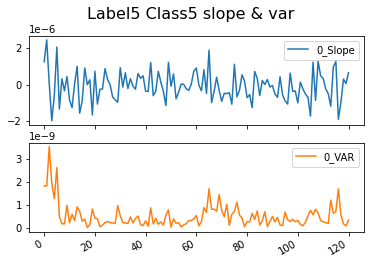

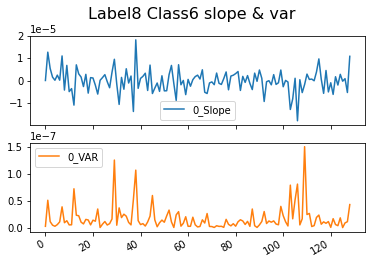

In [16]:
Features1.plot(y=['0_Slope', '0_VAR'], subplots=  True)
plt.suptitle('Label5 Class5 slope & var', fontsize=16)
Features2.plot(y=['0_Slope', '0_VAR'], subplots=  True)
plt.suptitle('Label8 Class6 slope & var', fontsize=16)

Text(0.5, 0.98, 'Label8 Class6 cross & spectral slope')

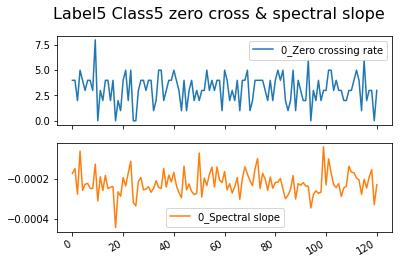

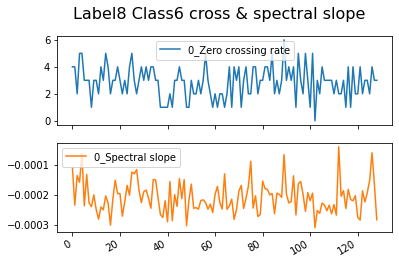

In [17]:
Features1.plot(y = ['0_Zero crossing rate', '0_Spectral slope'], subplots=  True)
plt.suptitle('Label5 Class5 zero cross & spectral slope', fontsize=16)
Features2.plot(y=['0_Zero crossing rate', '0_Spectral slope'], subplots=  True)
plt.suptitle('Label8 Class6 cross & spectral slope', fontsize=16)